In [23]:
import csv
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# 各パス指定

In [24]:
dataset = 'model/keypoint_classifier/keypoint.csv'
model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'

# 分類数設定

In [25]:
NUM_CLASSES = 6

# 学習データ読み込み

In [26]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [27]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# モデル構築

In [29]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input((21 * 2, )),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [30]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout_2 (Dropout)         (None, 42)                0         
                                                                 
 dense_3 (Dense)             (None, 20)                860       
                                                                 
 dropout_3 (Dropout)         (None, 20)                0         
                                                                 
 dense_4 (Dense)             (None, 10)                210       
                                                                 
 dense_5 (Dense)             (None, 6)                 66        
                                                                 
Total params: 1,136
Trainable params: 1,136
Non-trainable params: 0
_________________________________________________________________


In [31]:
# モデルチェックポイントのコールバック
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# 早期打ち切り用コールバック
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [32]:
# モデルコンパイル
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# モデル訓練

In [33]:
model.fit(
    X_train,
    y_train,
    epochs=1000,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1000
 1/33 [..............................] - ETA: 9s - loss: 1.7513 - accuracy: 0.2500
Epoch 1: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 5ms/step - loss: 1.7104 - accuracy: 0.2828 - val_loss: 1.6249 - val_accuracy: 0.3457
Epoch 2/1000
 1/33 [..............................] - ETA: 0s - loss: 1.6616 - accuracy: 0.3359
Epoch 2: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 1.6230 - accuracy: 0.3374 - val_loss: 1.5230 - val_accuracy: 0.4075
Epoch 3/1000
31/33 [===========================>..] - ETA: 0s - loss: 1.5509 - accuracy: 0.3654
Epoch 3: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 1.5489 - accuracy: 0.3665 - val_loss: 1.4287 - val_accuracy: 0.4822
Epoch 4/1000
 1/33 [..............................] - ETA: 0s - loss: 1.5985 - accuracy: 0.3359
E

 1/33 [..............................] - ETA: 0s - loss: 1.0199 - accuracy: 0.5938
Epoch 28: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.9703 - accuracy: 0.6344 - val_loss: 0.6469 - val_accuracy: 0.8599
Epoch 29/1000
 1/33 [..............................] - ETA: 0s - loss: 0.9976 - accuracy: 0.6016
Epoch 29: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.9641 - accuracy: 0.6410 - val_loss: 0.6395 - val_accuracy: 0.8478
Epoch 30/1000
 1/33 [..............................] - ETA: 0s - loss: 0.9379 - accuracy: 0.6016
Epoch 30: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.9370 - accuracy: 0.6427 - val_loss: 0.6249 - val_accuracy: 0.8535
Epoch 31/1000
 1/33 [..............................] - ETA: 0s - loss: 1.0049 - accuracy: 0.6328
Epoch 31

32/33 [============================>.] - ETA: 0s - loss: 0.8454 - accuracy: 0.6855
Epoch 55: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 3ms/step - loss: 0.8425 - accuracy: 0.6878 - val_loss: 0.4954 - val_accuracy: 0.8770
Epoch 56/1000
 1/33 [..............................] - ETA: 0s - loss: 0.9080 - accuracy: 0.6875
Epoch 56: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.8277 - accuracy: 0.6897 - val_loss: 0.4899 - val_accuracy: 0.8755
Epoch 57/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7493 - accuracy: 0.7188
Epoch 57: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.8380 - accuracy: 0.6866 - val_loss: 0.4914 - val_accuracy: 0.8791
Epoch 58/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7700 - accuracy: 0.7266
Epoch 58

 1/33 [..............................] - ETA: 0s - loss: 0.9366 - accuracy: 0.7031
Epoch 82: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7958 - accuracy: 0.7056 - val_loss: 0.4440 - val_accuracy: 0.8926
Epoch 83/1000
 1/33 [..............................] - ETA: 0s - loss: 0.8781 - accuracy: 0.6875
Epoch 83: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7959 - accuracy: 0.7103 - val_loss: 0.4454 - val_accuracy: 0.8947
Epoch 84/1000
 1/33 [..............................] - ETA: 0s - loss: 0.9151 - accuracy: 0.6406
Epoch 84: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7811 - accuracy: 0.7125 - val_loss: 0.4348 - val_accuracy: 0.9026
Epoch 85/1000
 1/33 [..............................] - ETA: 0s - loss: 0.8063 - accuracy: 0.6797
Epoch 85

 1/33 [..............................] - ETA: 0s - loss: 0.6979 - accuracy: 0.7344
Epoch 109: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7375 - accuracy: 0.7291 - val_loss: 0.4004 - val_accuracy: 0.9154
Epoch 110/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6682 - accuracy: 0.7734
Epoch 110: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7458 - accuracy: 0.7312 - val_loss: 0.4035 - val_accuracy: 0.9111
Epoch 111/1000
 1/33 [..............................] - ETA: 0s - loss: 0.8020 - accuracy: 0.7031
Epoch 111: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7517 - accuracy: 0.7312 - val_loss: 0.3960 - val_accuracy: 0.9175
Epoch 112/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7242 - accuracy: 0.7109
Ep

Epoch 136/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7277 - accuracy: 0.7422
Epoch 136: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7178 - accuracy: 0.7371 - val_loss: 0.3739 - val_accuracy: 0.9225
Epoch 137/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6739 - accuracy: 0.7891
Epoch 137: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7010 - accuracy: 0.7464 - val_loss: 0.3653 - val_accuracy: 0.9275
Epoch 138/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6819 - accuracy: 0.7188
Epoch 138: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7005 - accuracy: 0.7440 - val_loss: 0.3729 - val_accuracy: 0.9211
Epoch 139/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6910 - accu

Epoch 163/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7885 - accuracy: 0.7266
Epoch 163: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7079 - accuracy: 0.7438 - val_loss: 0.3663 - val_accuracy: 0.9253
Epoch 164/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7200 - accuracy: 0.7734
Epoch 164: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7209 - accuracy: 0.7369 - val_loss: 0.3590 - val_accuracy: 0.9282
Epoch 165/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6477 - accuracy: 0.7656
Epoch 165: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7301 - accuracy: 0.7357 - val_loss: 0.3747 - val_accuracy: 0.9218
Epoch 166/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6517 - accu

Epoch 190/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7071 - accuracy: 0.7188
Epoch 190: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7040 - accuracy: 0.7433 - val_loss: 0.3619 - val_accuracy: 0.9260
Epoch 191/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6647 - accuracy: 0.7500
Epoch 191: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.7015 - accuracy: 0.7397 - val_loss: 0.3710 - val_accuracy: 0.9246
Epoch 192/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6058 - accuracy: 0.7734
Epoch 192: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6939 - accuracy: 0.7440 - val_loss: 0.3605 - val_accuracy: 0.9289
Epoch 193/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7155 - accu

Epoch 217/1000
 1/33 [..............................] - ETA: 0s - loss: 0.7115 - accuracy: 0.7734
Epoch 217: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6875 - accuracy: 0.7537 - val_loss: 0.3415 - val_accuracy: 0.9317
Epoch 218/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6966 - accuracy: 0.7656
Epoch 218: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6859 - accuracy: 0.7554 - val_loss: 0.3484 - val_accuracy: 0.9275
Epoch 219/1000
 1/33 [..............................] - ETA: 0s - loss: 0.8896 - accuracy: 0.7109
Epoch 219: saving model to model/keypoint_classifier/keypoint_classifier.hdf5
33/33 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.7559 - val_loss: 0.3435 - val_accuracy: 0.9296
Epoch 220/1000
 1/33 [..............................] - ETA: 0s - loss: 0.6530 - accu

In [34]:
# モデル評価
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

11/11 [==============================] - 0s 853us/step - loss: 0.3462 - accuracy: 0.9282


In [35]:
# 保存したモデルのロード
model = tf.keras.models.load_model(model_save_path)

In [36]:
# 推論テスト
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 35ms/step
[0.15751976 0.05050861 0.13686278 0.0347557  0.47249785 0.14785518]
4


# 混同行列

44/44 [==============================] - 0s 590us/step


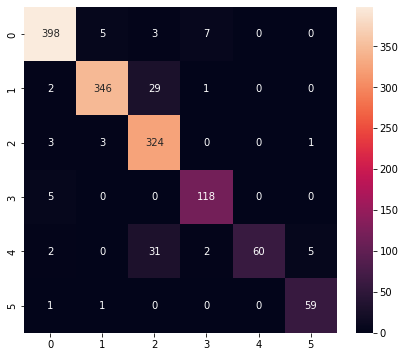

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       413
           1       0.97      0.92      0.94       378
           2       0.84      0.98      0.90       331
           3       0.92      0.96      0.94       123
           4       1.00      0.60      0.75       100
           5       0.91      0.97      0.94        61

    accuracy                           0.93      1406
   macro avg       0.93      0.90      0.91      1406
weighted avg       0.93      0.93      0.93      1406



In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Tensorflow-Lite用のモデルへ変換

In [38]:
# 推論専用のモデルとして保存
model.save(model_save_path, include_optimizer=False)

In [39]:
# モデルを変換(量子化)
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: /var/folders/33/700r8l5n1pv96shhjsh1tzb00000gr/T/tmprkkbk4vb/assets


INFO:tensorflow:Assets written to: /var/folders/33/700r8l5n1pv96shhjsh1tzb00000gr/T/tmprkkbk4vb/assets
2022-07-02 14:54:47.223351: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:362] Ignored output_format.
2022-07-02 14:54:47.223367: W tensorflow/compiler/mlir/lite/python/tf_tfl_flatbuffer_helpers.cc:365] Ignored drop_control_dependency.
2022-07-02 14:54:47.223474: I tensorflow/cc/saved_model/reader.cc:43] Reading SavedModel from: /var/folders/33/700r8l5n1pv96shhjsh1tzb00000gr/T/tmprkkbk4vb
2022-07-02 14:54:47.225083: I tensorflow/cc/saved_model/reader.cc:81] Reading meta graph with tags { serve }
2022-07-02 14:54:47.225096: I tensorflow/cc/saved_model/reader.cc:122] Reading SavedModel debug info (if present) from: /var/folders/33/700r8l5n1pv96shhjsh1tzb00000gr/T/tmprkkbk4vb
2022-07-02 14:54:47.230242: I tensorflow/cc/saved_model/loader.cc:228] Restoring SavedModel bundle.
2022-07-02 14:54:47.268510: I tensorflow/cc/saved_model/loader.cc:212] Running initialization

6604

# 推論テスト

In [40]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [41]:
# 入出力テンソルを取得
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [42]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [43]:
%%time
# 推論実施
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: user 163 µs, sys: 44 µs, total: 207 µs
Wall time: 212 µs


In [44]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[0.15751976 0.05050858 0.13686284 0.03475565 0.47249785 0.14785524]
4
